> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

(sec_Notebooks_qft)= 
# Quantum Fourier Transform (QFT) 

:::{contents}
:local:
:depth: 1
:::


In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import QFT
import numpy as np
from qiskit_aer import AerSimulator

In [2]:
# Definimos un registro
quantum_reg = QuantumRegister(4)

In [3]:
# Importamos el simulador. Con "method" le especificamos el método de simulación
simulador = AerSimulator(method = 'statevector')

::::{figure} ./Figuras/Fig_QFT_circuit.png
:width: 1000px
:align: center
::::


(sec_Notebooks_qft_1)= 
## QFT a mano  

In [4]:
""" Function to create QFT """
def create_QFT(circuit,reg,with_swaps):
    
    n = reg.size

    """ Apply the H gates and Cphases"""
    for j in reversed(range(n)):
        circuit.h(j)
        for k in reversed(range(j)):
            circuit.cp(np.pi/2**(j-k), reg[k], reg[j])
            

    """ If specified, apply the Swaps at the end """
    if with_swaps==True:
        for j in range(n//2):
            circuit.swap(reg[j],reg[n-j-1])

""" Function to create inverse QFT """
def create_inverse_QFT(circuit,reg,with_swaps):

    n = reg.size

    """ If specified, apply the Swaps at the end """
    if with_swaps==True:
        for j in range(n//2):
            circuit.swap(reg[j],reg[n-j-1])
    
    """ Apply the H gates and Cphases"""
    for j in range(n):
        
        for k in range(j):
            circuit.cp(np.pi/2**(j-k), reg[k], reg[j])
        circuit.h(j)
            



/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


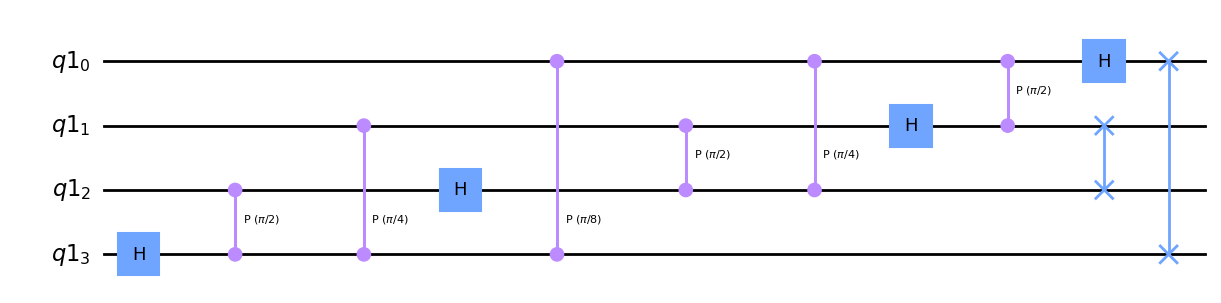

In [5]:
circuit_QFT_hand = QuantumCircuit(quantum_reg)

create_QFT(circuit_QFT_hand, quantum_reg, True)

circuit_QFT_hand.draw('mpl')

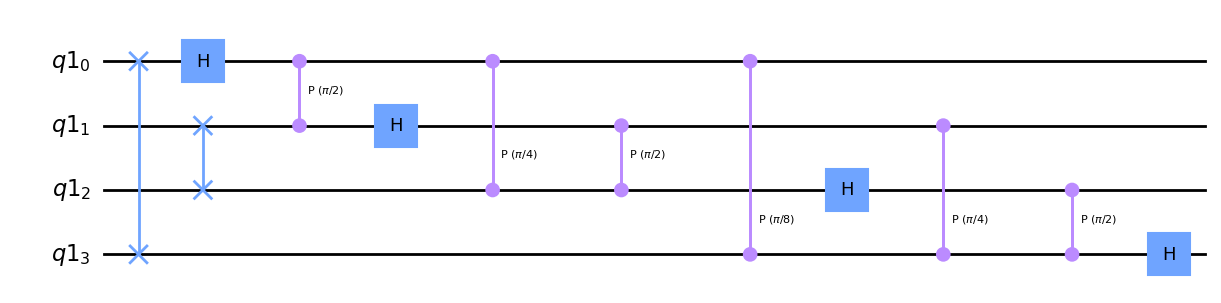

In [6]:
circuit_QFT_inv_hand = QuantumCircuit(quantum_reg)

create_inverse_QFT(circuit_QFT_inv_hand, quantum_reg, True)

circuit_QFT_inv_hand.draw('mpl')

(sec_Notebooks_qft_2)= 
## Usando la clase QFT de Qiskit 

Podemos usar la QFT de Qiskit importandola de `qiskit.circuit.library` (ya la hemos importado al principio):

`from qiskit.circuit.library import QFT`

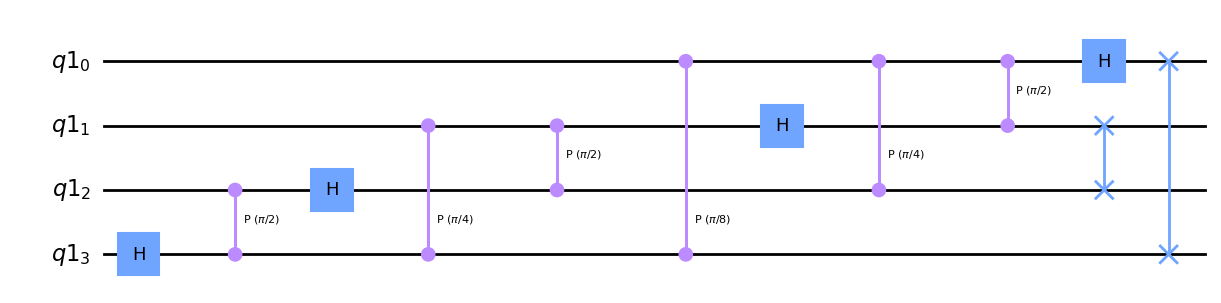

In [7]:
circuit_QFT_qiskit = QuantumCircuit(quantum_reg)

QFT_gate = QFT(quantum_reg.size).to_gate() 
#do_swaps=False, inverse=True, approximation_degree = 0

circuit_QFT_qiskit.append(QFT_gate, quantum_reg[:]) 
circuit_QFT_qiskit.decompose().decompose().draw('mpl')

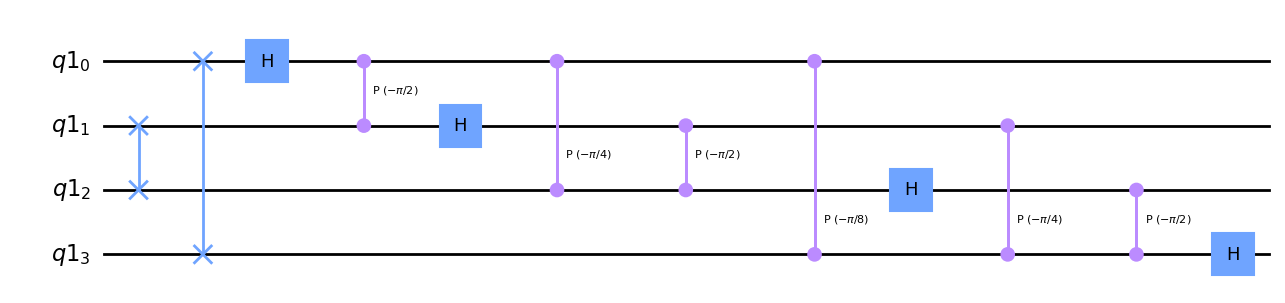

In [8]:
circuit_QFT_qiskit = QuantumCircuit(quantum_reg)

QFT_gate = QFT(quantum_reg.size, inverse=True).to_gate() 
#do_swaps=False, approximation_degree = 0

circuit_QFT_qiskit.append(QFT_gate, quantum_reg[:]) 
circuit_QFT_qiskit.decompose().decompose().draw('mpl')

(sec_Notebooks_qft_3)= 
## Ejecutamos

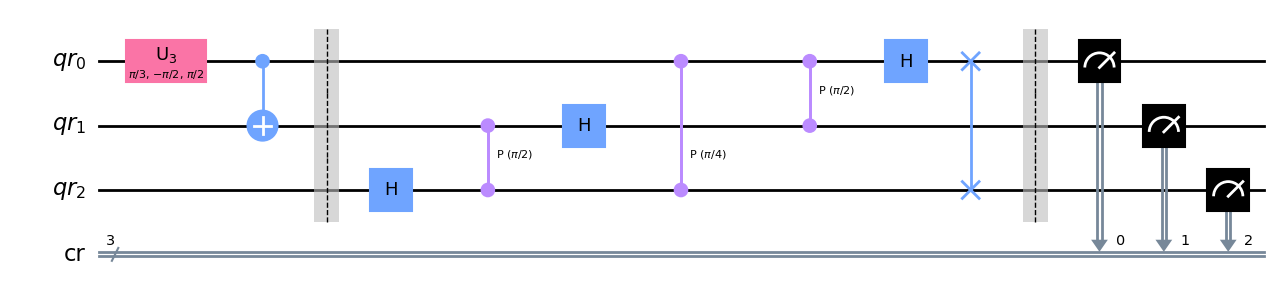

In [9]:
n = 3
qr_n = QuantumRegister(n, name='qr')
cr_n = ClassicalRegister(n,name='cr')

circuit_exe = QuantumCircuit(qr_n, cr_n, name="QFT")

############################################
###### Jugar con las inicializaciones ######

# Ejemplo 1
circuit_exe.rx(np.pi/3,0)
circuit_exe.cx(0,1)
#circuit_exe.x(0)

# Ejemplo 2 (estado |+++>)
#circuit_exe.h(range(n))

############################################

circuit_exe.barrier()

QFT_gate = QFT(qr_n.size, inverse=False).to_gate()
circuit_exe.append(QFT_gate, qr_n[:])

circuit_exe.barrier()
circuit_exe.measure(qr_n, cr_n)

circuit_exe.decompose().decompose().draw('mpl')

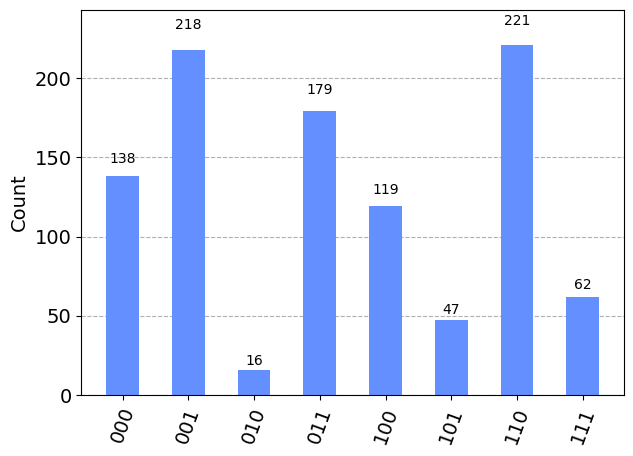

In [10]:
# transpilamos
t_circuit_exe = transpile(circuit_exe, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result = simulador.run(t_circuit_exe, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)

(sec_Notebooks_qft_4)= 
## QFT aproximada con Qiskit 

In [11]:
def QFT_approx(quantum_reg, approx_degree):

    circuit = QuantumCircuit(quantum_reg)

    QFT_gate = QFT(quantum_reg.size, approximation_degree = approx_degree).to_gate() 
    #do_swaps=False, inverse=True

    circuit.append(QFT_gate, quantum_reg[:]) 
    return circuit


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


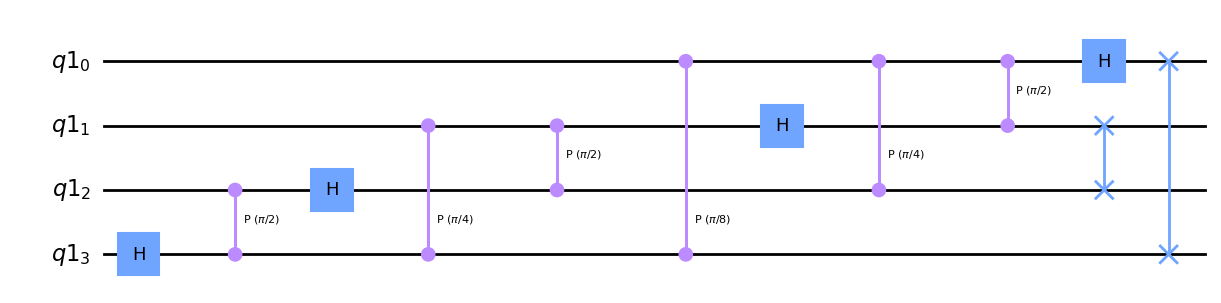

In [12]:
circuit_approx = QFT_approx(quantum_reg, 0)

circuit_approx.decompose().decompose().draw('mpl')

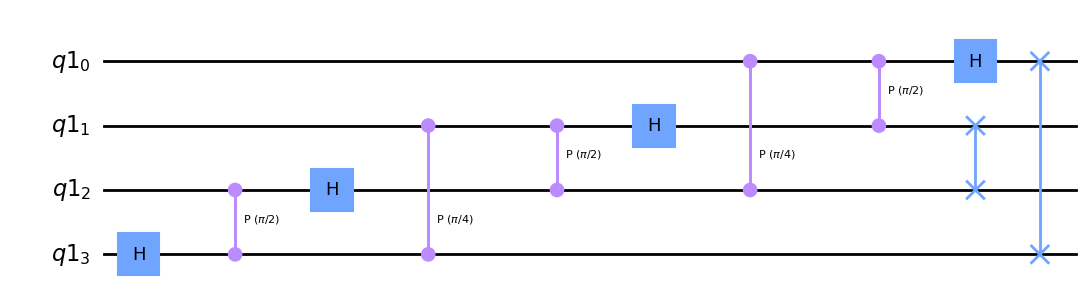

In [13]:
circuit_approx = QFT_approx(quantum_reg, 1)

circuit_approx.decompose().decompose().draw('mpl')

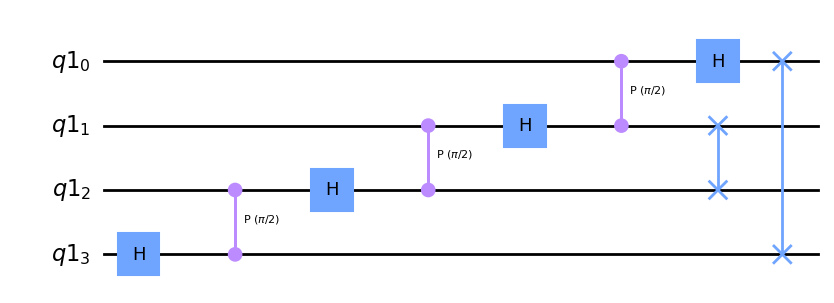

In [14]:
circuit_approx = QFT_approx(quantum_reg, 2)

circuit_approx.decompose().decompose().draw('mpl')